# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-06 07:00:15.797460


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/5/20


,10/5/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7457402,210181,2.82
Brazil,4927235,146675,2.98
India,6685082,103569,1.55
Mexico,789780,81877,10.37
United Kingdom,518222,42459,8.19
Italy,327586,36002,10.99
Peru,828169,32742,3.95


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/5/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
44631,US,7382341,2020-10-03,209384.0,687.0,50044.0,43219.714286
44630,US,7332297,2020-10-02,208697.0,907.0,54506.0,42480.857143
44629,US,7277791,2020-10-01,207790.0,858.0,44749.0,41920.714286
44628,US,7233042,2020-09-30,206932.0,946.0,41405.0,41832.571429
44627,US,7191637,2020-09-29,205986.0,914.0,42100.0,41408.000000
44626,US,7149537,2020-09-28,205072.0,316.0,33312.0,40960.142857
44625,US,7116225,2020-09-27,204756.0,266.0,36422.0,43696.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/5/20


,10/5/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,465515,33214.0,7.13
Texas,794319,16437.0,2.07
California,835507,16171.0,1.94
New Jersey,208713,16138.0,7.73
Florida,717874,14712.0,2.05
Massachusetts,135462,9530.0,7.04
Illinois,306088,9054.0,2.96


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/5/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1545,California,829521,2020-10-03,16115.0,61.0,3508.0,3152.857143
1544,California,826013,2020-10-02,16054.0,81.0,3808.0,3193.285714
1543,California,822205,2020-10-01,15973.0,88.0,3090.0,3241.285714
1542,California,819115,2020-09-30,15885.0,103.0,3461.0,3239.857143
1541,California,815654,2020-09-29,15782.0,149.0,2943.0,3227.000000
1540,California,812711,2020-09-28,15633.0,27.0,2821.0,3230.714286
1539,California,809890,2020-09-27,15606.0,23.0,2439.0,3388.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/5/20


,10/5/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,274942,6654.0,2.42
Orange,54760,1287.0,2.35
Riverside,60738,1238.0,2.04
San Bernardino,56400,962.0,1.71
San Diego,48660,803.0,1.65
San Joaquin,20569,471.0,2.29
Sacramento,23162,430.0,1.86


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/5/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4899,Los Angeles,273638,2020-10-03,6642.0,16.0,985.0,950.000000
4898,Los Angeles,272653,2020-10-02,6626.0,16.0,1282.0,982.571429
4897,Los Angeles,271371,2020-10-01,6610.0,34.0,1072.0,993.857143
4896,Los Angeles,270299,2020-09-30,6576.0,25.0,1015.0,995.142857
4895,Los Angeles,269284,2020-09-29,6551.0,36.0,829.0,1021.571429
4894,Los Angeles,268455,2020-09-28,6515.0,1.0,654.0,1001.285714
4893,Los Angeles,267801,2020-09-27,6514.0,10.0,813.0,1000.571429
4892,Los Angeles,266988,2020-09-26,6504.0,16.0,1213.0,1024.428571
4891,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4890,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571



7 day new US cases as of 10/5/20


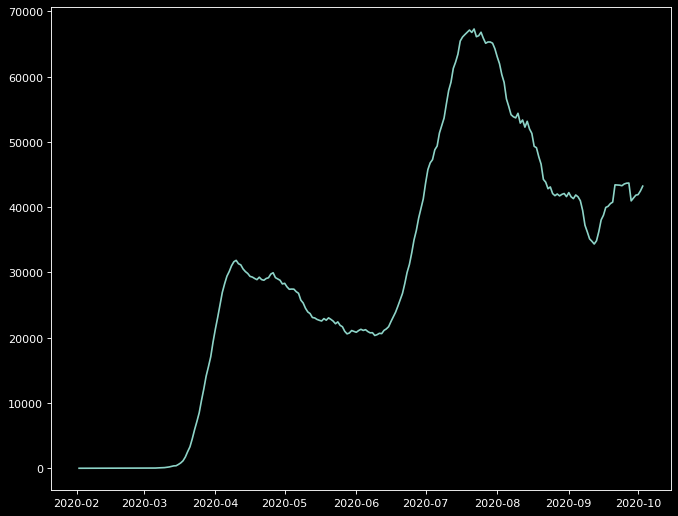

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/5/20


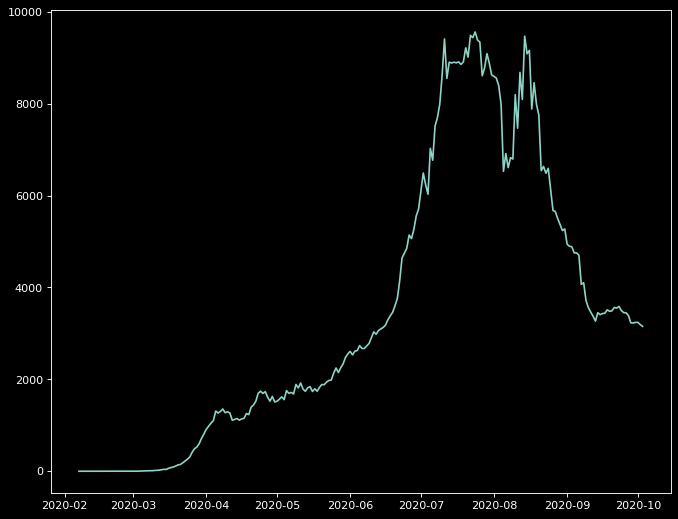

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/5/20


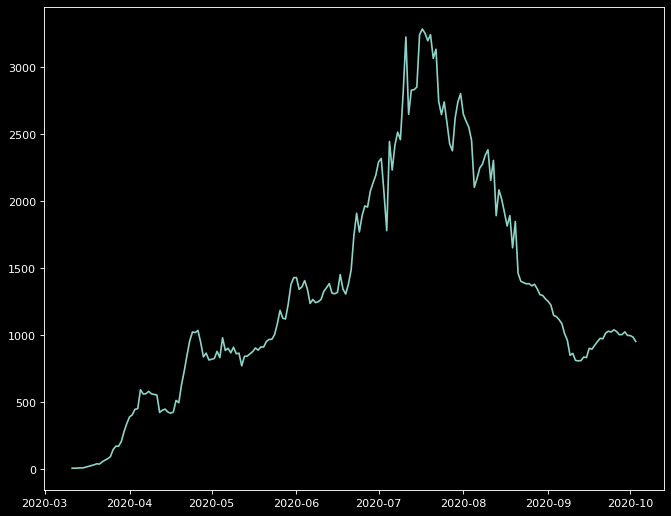

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()